# PyCaret 2 Regression Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

'3.2.0'

# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initialize Setup

In [3]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


# 3. Compare Baseline

In [4]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2692.5967,23300198.0477,4824.9530,0.8363,0.4516,0.3206,0.0300
rf,Random Forest Regressor,2812.0384,25762074.6370,5073.9111,0.8185,0.4804,0.3422,0.0660
lightgbm,Light Gradient Boosting Machine,3031.2276,25889278.6083,5087.1440,0.8167,0.5249,0.3778,0.2840
ada,AdaBoost Regressor,4186.0485,28235870.1457,5310.3789,0.8023,0.6167,0.6977,0.0180
et,Extra Trees Regressor,2858.1136,28778858.5534,5355.7976,0.8006,0.4938,0.3380,0.0560
lasso,Lasso Regression,4316.6205,38502498.2027,6193.3516,0.7346,0.6727,0.4435,0.3560
llar,Lasso Least Angle Regression,4316.6204,38502515.9192,6193.3530,0.7346,0.6726,0.4435,0.0160
br,Bayesian Ridge,4325.2565,38508496.3681,6193.7398,0.7346,0.6509,0.4450,0.0160
ridge,Ridge Regression,4332.6379,38515111.9005,6194.1822,0.7345,0.6300,0.4464,0.0160
lar,Least Angle Regression,4316.3678,38503541.5412,6193.4557,0.7345,0.6604,0.4434,0.0160


# 4. Create Model

In [5]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2896.4964,23611929.4013,4859.2108,0.8590,0.5993,0.3808
1,3075.9419,30047230.7486,5481.5354,0.8253,0.4622,0.3295
2,3090.7426,27877897.1696,5279.9524,0.6470,0.6213,0.4468
3,3247.8918,26531240.5577,5150.8485,0.7785,0.7497,0.5276
4,3263.7660,29391206.7843,5421.3658,0.7814,0.5628,0.3846
5,2930.1800,21751409.5632,4663.8406,0.8601,0.4058,0.2873
6,2733.8071,21012815.3865,4583.9738,0.8570,0.3991,0.3139
7,2865.5796,25843408.7132,5083.6413,0.8579,0.5027,0.2995
8,2715.5680,21671018.5929,4655.2141,0.8600,0.5233,0.4192


In [6]:
import numpy as np
lgbms = [create_model('lightgbm', learning_rate=i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2896.4964,23611929.4013,4859.2108,0.8590,0.5993,0.3808
1,3075.9419,30047230.7486,5481.5354,0.8253,0.4622,0.3295
2,3090.7426,27877897.1696,5279.9524,0.6470,0.6213,0.4468
3,3247.8918,26531240.5577,5150.8485,0.7785,0.7497,0.5276
4,3263.7660,29391206.7843,5421.3658,0.7814,0.5628,0.3846
5,2930.1800,21751409.5632,4663.8406,0.8601,0.4058,0.2873
6,2733.8071,21012815.3865,4583.9738,0.8570,0.3991,0.3139
7,2865.5796,25843408.7132,5083.6413,0.8579,0.5027,0.2995
8,2715.5680,21671018.5929,4655.2141,0.8600,0.5233,0.4192


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3294.3729,27343170.7958,5229.0698,0.8367,0.5506,0.4264
1,3375.4604,31126282.9931,5579.0934,0.8190,0.4972,0.3669
2,3426.4402,31502451.1701,5612.7044,0.6011,0.6802,0.5140
3,3723.6515,29950409.2350,5472.6967,0.7499,0.8393,0.6569
4,3582.4503,32310520.7453,5684.2344,0.7597,0.6791,0.4187
5,3332.7334,26023402.5822,5101.3138,0.8326,0.4388,0.3299
6,2928.2329,22650820.3195,4759.2878,0.8459,0.4321,0.3373
7,3033.8844,27206760.0349,5216.0100,0.8504,0.5674,0.3229
8,2949.5167,24921376.1568,4992.1314,0.8390,0.6194,0.4347


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3398.0378,28320934.6874,5321.7417,0.8308,0.7592,0.4582
1,3412.4641,32787408.2050,5726.0290,0.8094,0.5105,0.3455
2,3807.9595,33945872.9972,5826.3087,0.5702,0.7064,0.5934
3,3645.7491,32317505.9107,5684.8488,0.7302,0.6389,0.5582
4,4047.9761,38033227.7950,6167.1085,0.7171,0.7785,0.4886
5,3356.6158,27519093.6942,5245.8644,0.8230,0.5044,0.3471
6,3123.2988,23520387.0720,4849.7822,0.8400,0.4853,0.3915
7,3267.6762,29797154.4720,5458.6770,0.8362,0.6453,0.3553
8,3157.5366,26745404.8864,5171.5960,0.8273,0.5991,0.4868


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3605.8219,32376225.8252,5690.0111,0.8066,0.6411,0.4827
1,3762.1875,35969597.1606,5997.4659,0.7909,0.6032,0.4010
2,3977.9765,36844478.1633,6069.9653,0.5335,0.8260,0.5951
3,3860.0662,33806576.7270,5814.3423,0.7177,0.7604,0.6211
4,4027.8057,39935639.4864,6319.4651,0.7030,0.7176,0.4892
5,3615.7656,30111928.7864,5487.4337,0.8063,0.5711,0.3651
6,3320.6117,23949505.6302,4893.8232,0.8370,0.5299,0.4225
7,3272.1948,29137912.1223,5397.9544,0.8398,0.6523,0.3640
8,3499.4376,28015540.5597,5292.9709,0.8190,0.7495,0.5266


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3513.6143,31108182.1042,5577.4709,0.8142,0.6590,0.4669
1,3819.9326,36226767.1096,6018.8676,0.7894,0.5484,0.4090
2,3725.3584,34352356.4998,5861.0883,0.5651,0.7191,0.5169
3,4082.2823,36546310.5257,6045.3545,0.6948,0.7208,0.6426
4,4332.4361,43263174.4977,6577.4748,0.6782,0.7021,0.5156
5,3834.8012,31961996.4604,5653.4942,0.7944,0.5286,0.3939
6,3408.2927,26250121.2586,5123.4872,0.8214,0.9966,0.4636
7,3543.2393,30815402.6659,5551.1623,0.8306,0.7426,0.3853
8,3532.1376,28926773.5175,5378.3616,0.8132,0.7678,0.5810


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3671.5731,33022885.4710,5746.5542,0.8028,0.7691,0.5081
1,4088.1443,37442742.9251,6119.0476,0.7823,0.8518,0.5050
2,4104.7483,39752011.5584,6304.9196,0.4967,0.9224,0.6324
3,4372.3004,38164867.4369,6177.7720,0.6813,0.7483,0.7419
4,4277.9472,40593127.8132,6371.2736,0.6981,0.7931,0.5304
5,3817.8941,32124356.5926,5667.8353,0.7934,0.5043,0.3853
6,3499.4566,26150030.7417,5113.7101,0.8221,0.7540,0.4468
7,3542.6029,32176847.4096,5672.4640,0.8231,0.6825,0.3957
8,3622.9655,29703438.4273,5450.0861,0.8081,0.7878,0.5717


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3800.7227,34502654.4583,5873.8960,0.7939,0.6806,0.5518
1,3975.4408,37638046.2135,6134.9854,0.7812,1.0733,0.4491
2,4338.7389,43379908.7295,6586.3426,0.4508,0.7529,0.6595
3,4309.5335,38386471.8474,6195.6817,0.6795,0.6557,0.6855
4,4533.6856,43764076.4925,6615.4423,0.6745,0.8383,0.5350
5,4012.8085,32330708.6820,5686.0099,0.7920,0.5964,0.4552
6,3233.8854,23209786.8332,4817.6537,0.8421,0.5586,0.3950
7,3394.2813,28726562.3841,5359.7166,0.8420,0.6562,0.4061
8,3911.1269,37288934.0405,6106.4666,0.7591,0.7145,0.6148


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3901.1501,33407909.5138,5779.9576,0.8005,0.6332,0.5465
1,3894.4538,35792361.9260,5982.6718,0.7919,0.7934,0.4567
2,4364.3956,41730344.1657,6459.9028,0.4716,1.1354,0.6994
3,4357.9617,39271904.6382,6266.7300,0.6721,0.7777,0.6973
4,4736.6713,48565863.4641,6968.9213,0.6388,0.8131,0.5943
5,3971.2275,30949082.9762,5563.1900,0.8009,0.7791,0.4515
6,3979.9036,30922275.4405,5560.7801,0.7896,0.8626,0.5074
7,3646.5804,30203949.4641,5495.8120,0.8339,0.6590,0.4550
8,4036.7227,34471349.3997,5871.2307,0.7773,0.6374,0.6359


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4173.3324,39139748.1834,6256.1768,0.7662,0.8205,0.5664
1,4236.0569,39000538.8575,6245.0411,0.7732,0.8700,0.5685
2,4719.0503,47477885.5546,6890.4198,0.3989,0.8416,0.6736
3,4497.4254,40851909.2955,6391.5498,0.6589,0.7291,0.7448
4,4871.8915,46585855.3037,6825.3832,0.6535,0.8000,0.6197
5,3793.1808,31868191.0791,5645.1919,0.7950,0.7047,0.4010
6,3597.4154,31562920.0644,5618.0886,0.7852,0.6428,0.4109
7,3769.9320,32428477.1491,5694.6007,0.8217,0.7866,0.4600
8,4125.3135,36321617.8581,6026.7419,0.7654,0.6521,0.6486


In [7]:
print(len(lgbms))

9


# 5. Tune Hyperparameters

In [8]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:31:31
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2507.1472,19161216.4189,4377.3527,0.8856,0.4206,0.2964
1,3071.7343,28514730.3966,5339.9186,0.8342,0.4308,0.3030
2,2642.7074,21932703.0593,4683.2364,0.7223,0.5162,0.3532
3,2824.3064,20669291.4077,4546.3492,0.8274,0.4526,0.3835
4,2955.9030,27465990.6244,5240.8006,0.7957,0.5374,0.3031
5,2620.0013,18677513.5606,4321.7489,0.8799,0.3398,0.2500
6,2581.3434,19898977.1467,4460.8270,0.8646,0.4244,0.3232
7,2731.0300,24976353.0927,4997.6347,0.8627,0.4492,0.2569
8,2500.9795,20056050.4587,4478.3982,0.8705,0.4241,0.3346


Fitting 10 folds for each of 50 candidates, totalling 500 fits
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [9]:
tuned_lightgbm

LGBMRegressor(bagging_fraction=0.8, bagging_freq=2, feature_fraction=0.5,
              min_child_samples=61, min_split_gain=0.2, n_estimators=300,
              n_jobs=-1, num_leaves=6, random_state=123, reg_alpha=1e-07,
              reg_lambda=10)

# 6. Ensemble Model

In [10]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3244.6173,45002914.9978,6708.4212,0.7312,0.5884,0.4883
1,3121.3069,45456737.6696,6742.1612,0.7357,0.5398,0.3300
2,3646.2662,54445682.2627,7378.7318,0.3107,0.6475,0.4752
3,3228.2250,44536493.7924,6673.5668,0.6281,0.5698,0.4253
4,4344.7470,65261429.3013,8078.4546,0.5146,0.7261,0.6008
5,3497.9281,42984919.0254,6556.2885,0.7235,0.4614,0.3208
6,3464.9372,51736922.8950,7192.8383,0.6480,0.5064,0.3792
7,2804.7111,37461846.7208,6120.6084,0.7940,0.4737,0.1787
8,3080.1801,42102090.8846,6488.6124,0.7281,0.5168,0.4537


In [11]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2699.4754,22914336.7855,4786.8922,0.8631,0.4711,0.3443
1,2831.2467,29980735.8579,5475.4667,0.8257,0.4639,0.2877
2,2864.8778,25745540.8720,5074.0064,0.6740,0.5575,0.4103
3,2973.7628,26176140.2681,5116.2623,0.7814,0.5431,0.4515
4,3030.0023,30644929.4044,5535.7862,0.7721,0.5620,0.3736
5,2920.6942,24220715.4967,4921.4546,0.8442,0.3812,0.2669
6,2542.0626,22776149.7373,4772.4365,0.8450,0.3756,0.2821
7,2595.9174,24486514.4711,4948.3850,0.8654,0.4432,0.2404
8,2307.0389,18615568.1520,4314.5762,0.8798,0.4232,0.3352


In [12]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1746.6531,20643719.4928,4543.5360,0.8767,0.4074,0.1675
1,2241.8726,32362162.4596,5688.7751,0.8118,0.4118,0.1286
2,2392.6530,32847809.4992,5731.3009,0.5841,0.5593,0.2931
3,1945.1432,21809063.2050,4670.0175,0.8179,0.3644,0.1662
4,2798.9886,37099381.8334,6090.9262,0.7241,0.5916,0.3102
5,3206.2470,42138546.9895,6491.4210,0.7289,0.4406,0.2501
6,1975.4315,26028317.7743,5101.7955,0.8229,0.3365,0.1408
7,1990.4079,24096760.1889,4908.8451,0.8675,0.4472,0.1479
8,2094.1024,25474853.1172,5047.2619,0.8355,0.4142,0.2000


# 7. Blend Models

In [13]:
blender = blend_models()

TypeError: blend_models() missing 1 required positional argument: 'estimator_list'

# 8. Stack Models

In [ ]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold = 5, whitelist = models(type='ensemble').index.tolist()))

TypeError: compare_models() got an unexpected keyword argument 'whitelist'

# 9. Analyze Model

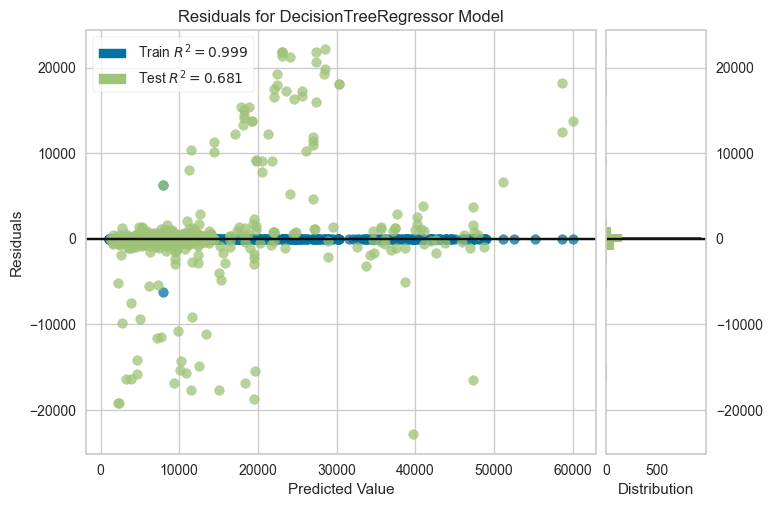

In [14]:
plot_model(dt)

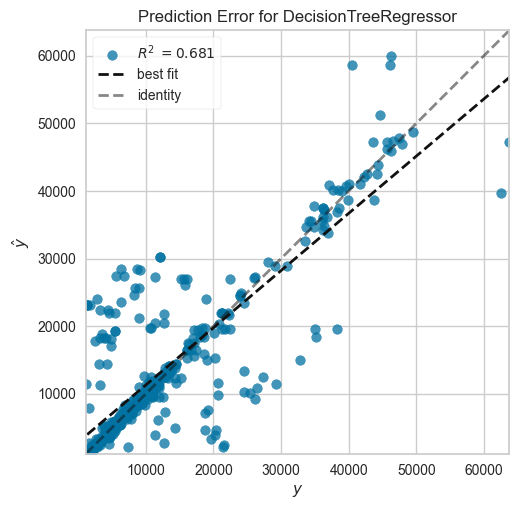

In [15]:
plot_model(dt, plot = 'error')

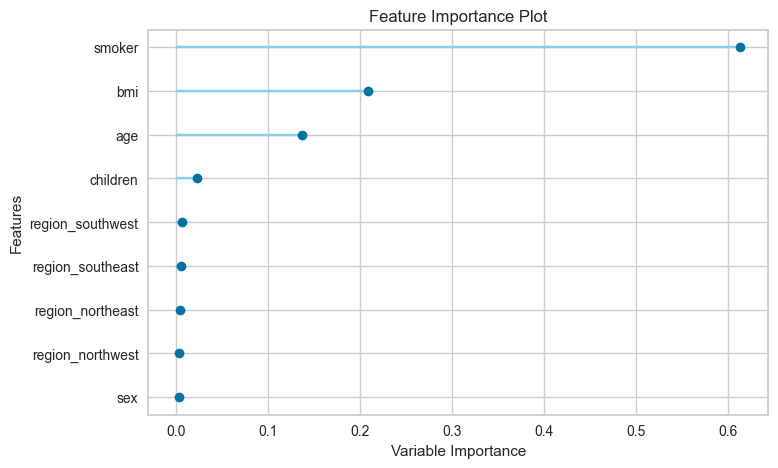

In [16]:
plot_model(dt, plot = 'feature')

In [17]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 10. Interpret Model

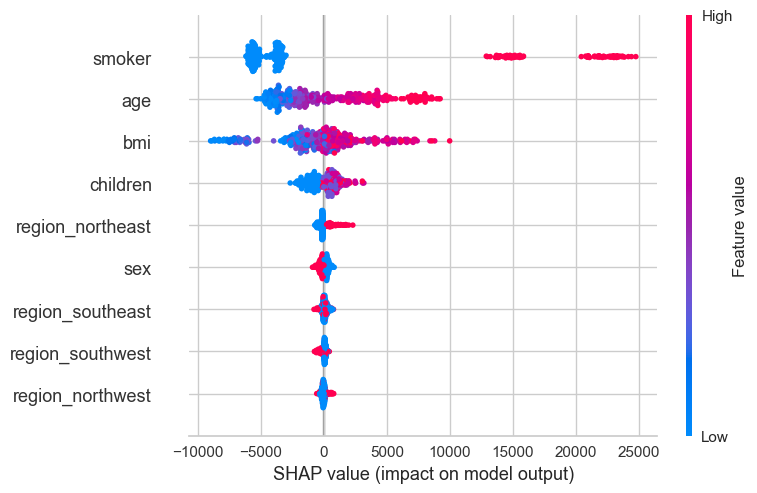

In [18]:
interpret_model(lightgbm)

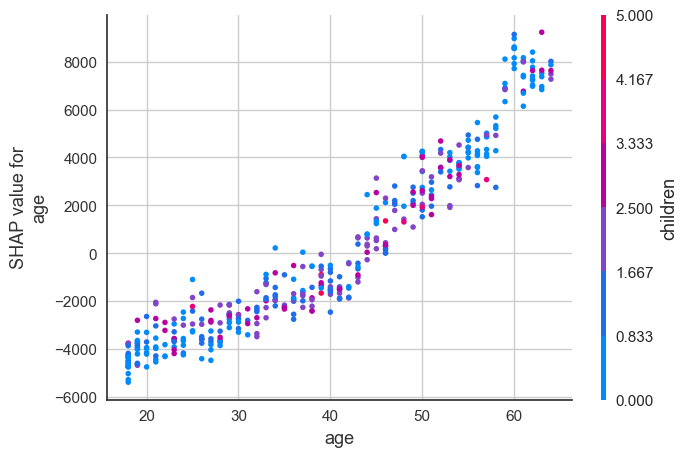

In [19]:
interpret_model(lightgbm, plot = 'correlation')

In [20]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [21]:
best = automl(optimize = 'MAE')
best

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

# 12. Predict Model

In [22]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2727.6353,20349120.9646,4511.0000,0.8576,0.4906,0.3544


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,9318.052985
319,32,male,37.334999,1,no,northeast,4667.607422,9479.902222
314,27,female,31.400000,0,yes,southwest,34838.871094,35083.912492
150,35,male,24.129999,1,no,northwest,5125.215820,5952.691971
336,60,male,25.740000,0,no,southeast,12142.578125,16955.956457


In [23]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,16884.923828
1,18,male,33.770000,1,no,southeast,1725.552246
2,28,male,33.000000,3,no,southeast,4449.461914
3,33,male,22.705000,0,no,northwest,21984.470703
4,32,male,28.879999,0,no,northwest,3972.924805


# 13. Save / Load Model

In [24]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': no     0
 yes    1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=

In [25]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/var/folders/rc/xt1rcjcn7nq5k_lmm5vpz4t40000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encodin...
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
         

In [26]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

TransformerWrapper(include=['age', 'bmi', 'children'],
                   transformer=SimpleImputer())

In [27]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [28]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

ValueError: Boto3 credentials not configured. Refer boto3 documentation (https://boto3.amazonaws.com/v1/documentation/api/latest/guide/credentials.html)

# 15. Get Config / Set Config

In [ ]:
X_train = get_config('X_train')
X_train.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.55,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
904,60.0,35.10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
670,30.0,31.57,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
617,49.0,25.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
373,26.0,32.90,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
get_config('seed')

123

In [ ]:
from pycaret.regression import set_config
set_config('seed', 999)

In [ ]:
get_config('seed')

999

# 16. MLFlow UI

In [ ]:
!mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org